In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.stats import gamma, halfnorm
from tqdm import tqdm
import corner
import emcee
from emcee.moves import WalkMove,DEMove
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from emcee.moves import GaussianMove
from matplotlib.lines import Line2D


In [2]:
x = np.array([0.04330127006913202,	
0.04999999999981704	
,0.05873678649902327	
,0.07500000037654297	
,0.09058666578581276	
,0.09914450489134946	
,0.11646857028453979	
,0.12990381056731237	
,0.14871691421859828	
,0.15867073038481103	
,0.18262842855923792	
,0.19833833607688725	
,0.22500000000006706	
,0.24748737341553034	
,0.2739426430539203
,0.29743345953905714	
,0.3233578363783551		
,0.3535533906864989	
,0.39657794465537494	
,0.4461501516094344	])
x.shape

(20,)

In [3]:
y = np.array([
-3.2146335541767
,-3.0602709391830
,-2.6509545283382
,-2.9492265921745
,-3.0200801823019
,-2.9411713554349
,-2.5763799817693
,-2.6946482827198
,-2.6368506172384
,-2.5997375497890
,-2.5386880548195
,-2.5554153237870
,-2.2042359990242
,-2.5509059870583
,-2.18554209191491
,-2.5087712715312
,-2.30149412707814
,-2.06315817953411
,-1.9774563917098
,-2.05421840513918
])
y.shape

(20,)

In [4]:
errory = np.array([0.388486470951241	
,0.3071857349321623	
,0.2423094200928193	
,0.31611288952165095	
,0.453150405666618	
,0.23465308110818706	
,0.294583703960543
,0.15428402950755293	
,0.31391653188986623	
,0.32015214291506044	
,0.42569821558288057	
,0.20276712434154254	
,0.2750805003236527	
,0.28325194395516773	
,0.3061740109613511	
,0.19633369858334992	
,0.2550522222270657	
,0.13260762482205846	
,0.21472741090716863	
,0.20817854715046846	
])
errory.shape

(20,)

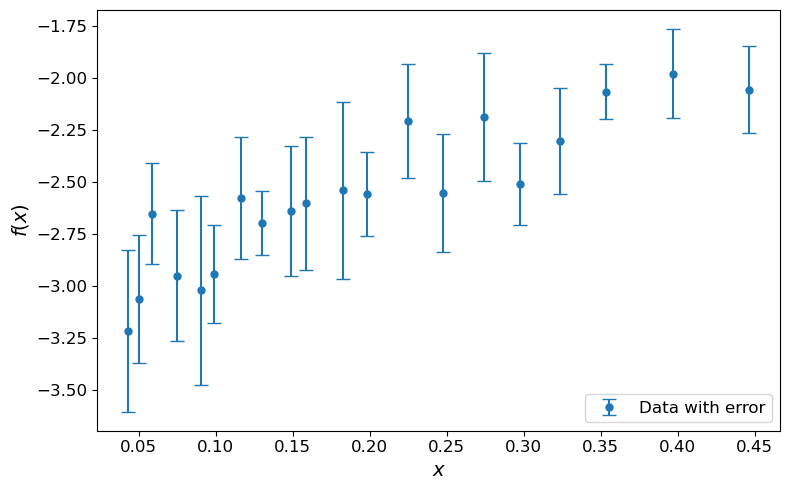

In [5]:
plt.figure(figsize=(8, 5))  # Consistent size for both figures

# Scatter plot with error bars
plt.errorbar(x, y, yerr=errory, fmt='o', capsize=5, 
             linewidth=1.5, markersize=5, label='Data with error')

# Axis labels
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)

# Ticks and Grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.legend(loc = "lower right",fontsize=12)

# Layout and Save
plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\1ddatawitherror.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
xtrain, xtest, ytrain, ytest,etrain,etest = train_test_split(x, y,errory, test_size=0.2,shuffle = True,random_state = 25,)
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

## Optimising Plots

1.08**2 * RBF(length_scale=0.109) + WhiteKernel(noise_level=0.105)
0.10852381862913764 1.159634833486016 0.1049965229890869


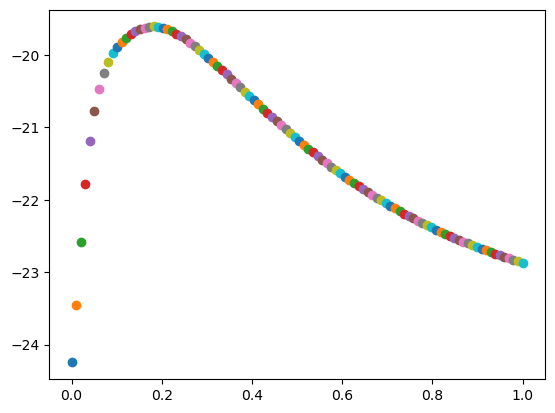

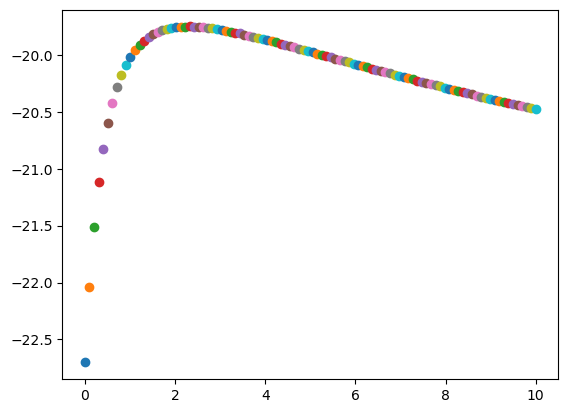

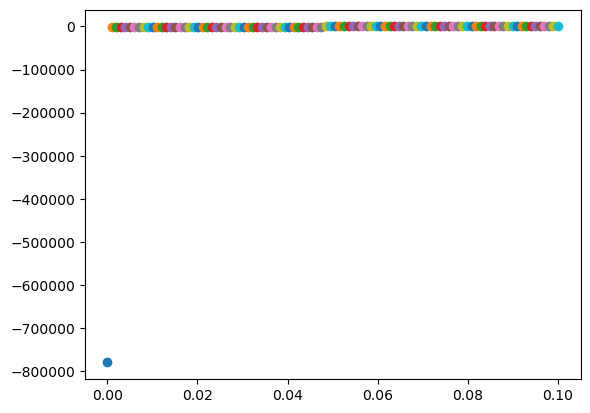

In [7]:
boundsl = ((1e-1, 2))  
initl = 0.5
initvar = 2.0
varbounds = (1e-2, 4)
noiselvl = 1
noiselvlbounds = (1e-2, 4)

kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
         RBF(length_scale=initl, length_scale_bounds=boundsl) + WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)
gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True,n_restarts_optimizer=100, random_state=42)
gpr1.fit(xtrain, ytrain)
print(gpr1.kernel_)
#print(np.exp(gpr1.kernel_.theta))
variance = np.exp(gpr1.kernel_.theta[0])
length = np.exp(gpr1.kernel_.theta[1])
noiselvl = np.exp(gpr1.kernel_.theta[2])
print(length,variance,noiselvl)

lpeak,varpeak,noisepeak = [length,variance,noiselvl]

lengths = np.linspace(1e-6, 1, 100)
for l in lengths:
    initvar = 1.0
    #varbounds = (1e-20, 10)
    noiselvl = 1
    #noiselvlbounds = (1e-20, 10)
    kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
    RBF(length_scale=l, length_scale_bounds=boundsl) + WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)
    gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True,optimizer=None, random_state=42)
    gpr1.fit(xtrain, ytrain)
    #print(np.exp(gpr1.kernel_.theta))
    length = np.exp(gpr1.kernel_.theta[0])
    variance = np.exp(gpr1.kernel_.theta[1])
    noiselvl = np.exp(gpr1.kernel_.theta[2])
    log_like = gpr1.log_marginal_likelihood()
    plt.scatter(l,log_like)


plt.figure()
vars = np.linspace(1e-6, 10, 100)
for var in vars:
    l = 0.3
    #varbounds = (1e-20, 10)
    noiselvl = 1
    #noiselvlbounds = (1e-20, 10)
    kernel = C(constant_value=var, constant_value_bounds=varbounds) * \
    RBF(length_scale=l, length_scale_bounds=boundsl) + WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)
    gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True,optimizer=None, random_state=42)
    gpr1.fit(xtrain, ytrain)
    #print(np.exp(gpr1.kernel_.theta))
    length = np.exp(gpr1.kernel_.theta[0])
    variance = np.exp(gpr1.kernel_.theta[1])
    noiselvl = np.exp(gpr1.kernel_.theta[2])
    log_like = gpr1.log_marginal_likelihood()
    plt.scatter(var,log_like)

plt.figure()
noises = np.linspace(1e-6, .1, 100)
for noise in noises:
    l = 1.15
    #varbounds = (1e-20, 10)
    var = .1    #noiselvlbounds = (1e-20, 10)
    kernel = C(constant_value=var, constant_value_bounds=varbounds) * \
    RBF(length_scale=l, length_scale_bounds=boundsl) + WhiteKernel(noise, noise_level_bounds=noiselvlbounds)
    gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True,optimizer=None, random_state=42)
    gpr1.fit(xtrain, ytrain)
    #print(np.exp(gpr1.kernel_.theta))
    length = np.exp(gpr1.kernel_.theta[0])
    variance = np.exp(gpr1.kernel_.theta[1])
    noiselvl = np.exp(gpr1.kernel_.theta[2])
    log_like = gpr1.log_marginal_likelihood()
    plt.scatter(noise,log_like)

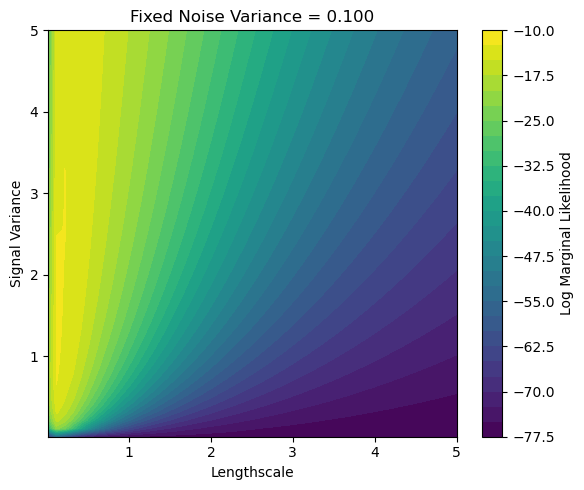

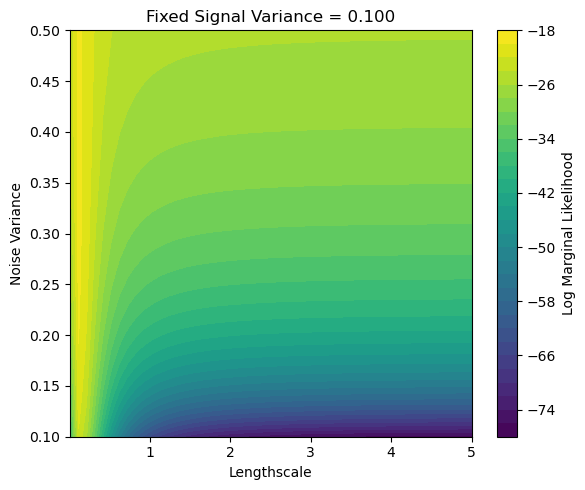

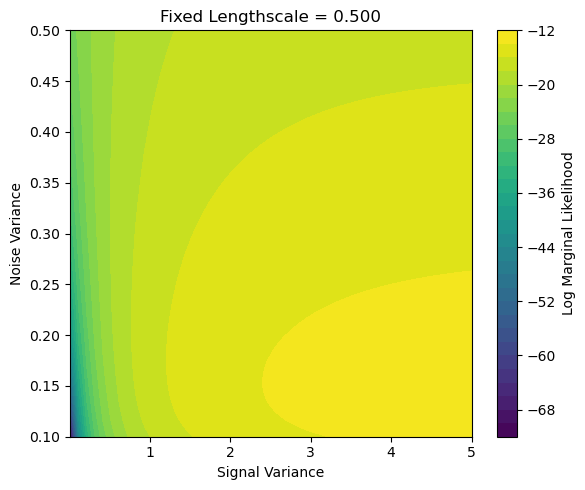

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# Training data (replace this with your real data)
# xtrain, ytrain should be defined elsewhere in your code
# Example (dummy data):
# xtrain = np.random.rand(20, 1) * 10
# ytrain = np.sin(xtrain).ravel()

# Define bounds
boundsl = ((1e-4, 10))
varbounds = (1e-20, 10)
noiselvlbounds = (0.1, .15)

# Define grids
lengths = np.linspace(0.01, 5, 50)
variances = np.linspace(0.01, 5, 50)
noises = np.linspace(1e-1, 0.5, 50)

# ----------------------------
# Contour 1: Lengthscale vs Variance (fix noise)
# ----------------------------
fixed_noise = 0.1
L, V = np.meshgrid(lengths, variances)
LML1 = np.zeros_like(L)

for i in range(L.shape[0]):
    for j in range(L.shape[1]):
        kernel = C(V[i, j], constant_value_bounds=varbounds) * RBF(L[i, j], length_scale_bounds=boundsl) + WhiteKernel(fixed_noise, noise_level_bounds=noiselvlbounds)
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML1[i, j] = gpr.log_marginal_likelihood()

plt.figure(figsize=(6, 5))
plt.contourf(L, V, LML1, levels=30, cmap='viridis')
plt.colorbar(label='Log Marginal Likelihood')
plt.xlabel('Lengthscale')
plt.ylabel('Signal Variance')
plt.title(f'Fixed Noise Variance = {fixed_noise:.3f}')
plt.tight_layout()
plt.show()

# ----------------------------
# Contour 2: Lengthscale vs Noise (fix variance)
# ----------------------------
fixed_variance = .1
L, N = np.meshgrid(lengths, noises)
LML2 = np.zeros_like(L)

for i in range(L.shape[0]):
    for j in range(L.shape[1]):
        kernel = C(fixed_variance, constant_value_bounds=varbounds) * RBF(L[i, j], length_scale_bounds=boundsl) + WhiteKernel(N[i, j], noise_level_bounds=noiselvlbounds)
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML2[i, j] = gpr.log_marginal_likelihood()

plt.figure(figsize=(6, 5))
plt.contourf(L, N, LML2, levels=30, cmap='viridis')
plt.colorbar(label='Log Marginal Likelihood')
plt.xlabel('Lengthscale')
plt.ylabel('Noise Variance')
plt.title(f'Fixed Signal Variance = {fixed_variance:.3f}')
plt.tight_layout()
plt.show()

# ----------------------------
# Contour 3: Variance vs Noise (fix lengthscale)
# ----------------------------
fixed_lengthscale = 0.5
V, N = np.meshgrid(variances, noises)
LML3 = np.zeros_like(V)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        kernel = C(V[i, j], constant_value_bounds=varbounds) * RBF(fixed_lengthscale, length_scale_bounds=boundsl) + WhiteKernel(N[i, j], noise_level_bounds=noiselvlbounds)
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML3[i, j] = gpr.log_marginal_likelihood()

plt.figure(figsize=(6, 5))
plt.contourf(V, N, LML3, levels=30, cmap='viridis')
plt.colorbar(label='Log Marginal Likelihood')
plt.xlabel('Signal Variance')
plt.ylabel('Noise Variance')
plt.title(f'Fixed Lengthscale = {fixed_lengthscale:.3f}')
plt.tight_layout()
plt.show()


In [9]:
boundsl = ((1e-4, 10))
varbounds = (1e-20, 10)
noiselvlbounds = (1e-20, 10)

lengths = np.linspace(0.01, 2, 100)     
variances = np.linspace(0.01, 3, 100)   
fixed_noise = 0.104                    

L, V = np.meshgrid(lengths, variances)
LML = np.zeros_like(L)
print("Evaluating Log Marginal Likelihood over grid...")
for i in tqdm(range(L.shape[0]), desc="Loop over Lengthscale"):
    for j in range(L.shape[1]):
        kernel = C(constant_value=V[i, j], constant_value_bounds=varbounds) * \
                 RBF(length_scale=L[i, j], length_scale_bounds=boundsl) + \
                 WhiteKernel(noise_level=fixed_noise, noise_level_bounds=noiselvlbounds)
        
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML[i, j] = gpr.log_marginal_likelihood()

Evaluating Log Marginal Likelihood over grid...


Loop over Lengthscale: 100%|██████████| 100/100 [00:13<00:00,  7.29it/s]


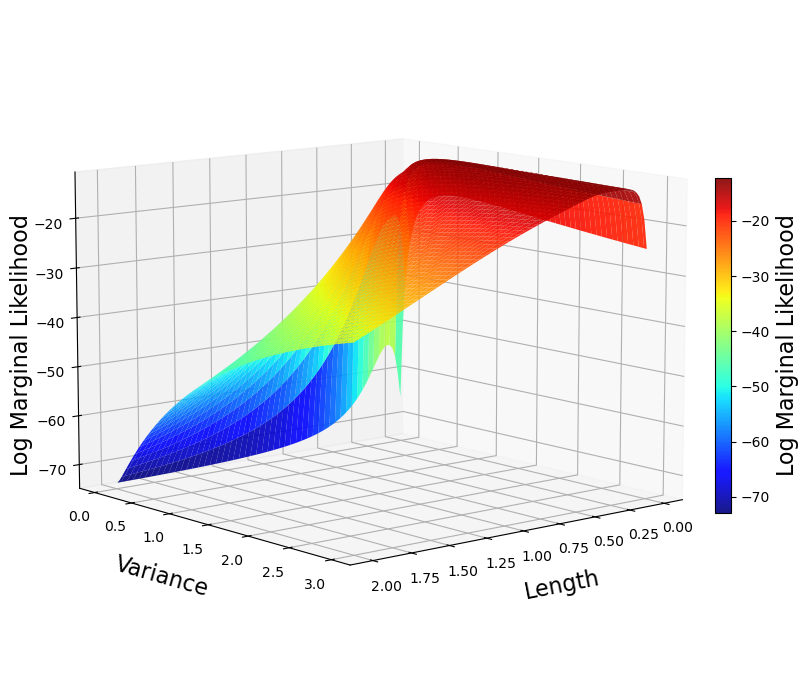

In [10]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(L, V, LML, cmap='jet', edgecolor='none', alpha=0.9)
ax.set_xlabel('Length', fontsize=16, labelpad=12)
ax.set_ylabel('Variance', fontsize=16, labelpad=12)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel('Log Marginal Likelihood', fontsize=12, labelpad=12)
fig.text(0.135, 0.5, 'Log Marginal Likelihood', va='center', rotation='vertical', fontsize=16)
cbar = plt.colorbar(surf, pad=0.01, shrink=0.5)
cbar.set_label('Log Marginal Likelihood', fontsize=16)
#ax.scatter(lpeak,varpeak)

# Title
#plt.title(f'GP Log Marginal Likelihood (Noise fixed at {fixed_noise})', fontsize=14)

# View angle
ax.view_init(elev=10, azim=50)  # Adjust angles as desired

plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Variancevslength.png",dpi=300, bbox_inches='tight')
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# --- Setup --- #
boundsl = ((1e-4, 10))
varbounds = (1e-20, 10)
noiselvlbounds = (1e-20, 10)

# --- Define ranges --- #
fixed_length = 0.5                 # <-- Now we keep lengthscale fixed
variances = np.linspace(0.1, 2, 100)
noises = np.linspace(0.01, 0.2, 100)

# --- Build 2D grid of variance and noise --- #
V, N = np.meshgrid(variances, noises)
LML = np.zeros_like(V)

print("Evaluating Log Marginal Likelihood over grid (lengthscale fixed)...")
for i in tqdm(range(V.shape[0]), desc="Loop over Variance"):
    for j in range(V.shape[1]):
        kernel = (C(constant_value=V[i, j], constant_value_bounds=varbounds)
                  * RBF(length_scale=fixed_length, length_scale_bounds=boundsl)
                  + WhiteKernel(noise_level=N[i, j], noise_level_bounds=noiselvlbounds))
        
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML[i, j] = gpr.log_marginal_likelihood()


Evaluating Log Marginal Likelihood over grid (lengthscale fixed)...


Loop over Variance: 100%|██████████| 100/100 [00:13<00:00,  7.26it/s]


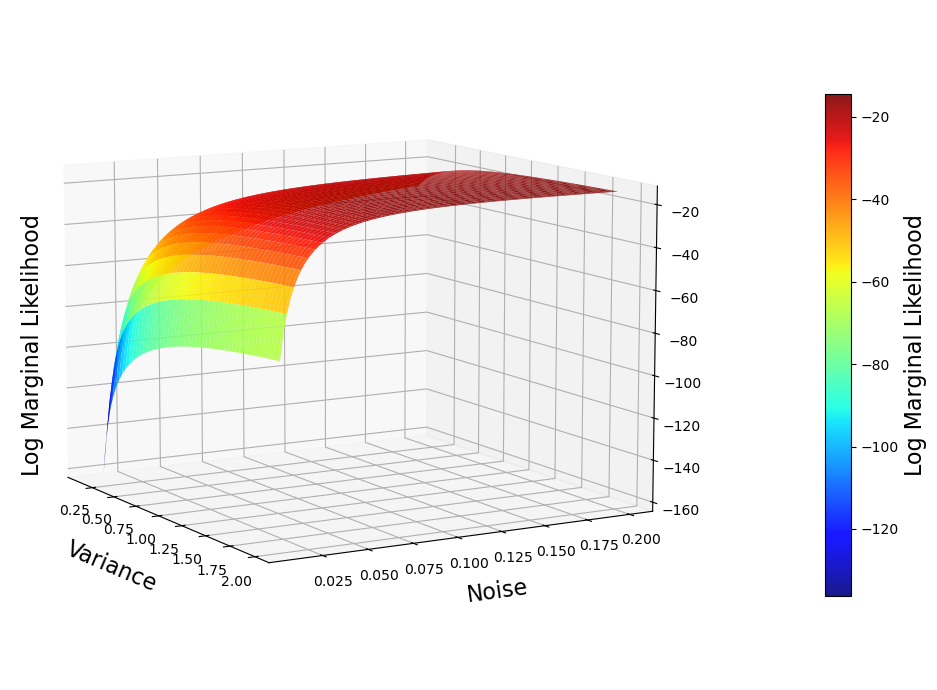

In [12]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (Variance on X-axis, Noise on Y-axis, LML on Z-axis)
surf = ax.plot_surface(V, N, LML, cmap='jet', edgecolor='none', alpha=0.9)

# Axis labels
ax.set_xlabel('Variance', fontsize=16, labelpad=12)
ax.set_ylabel('Noise', fontsize=16, labelpad=12)
#ax.set_zlabel('Log Marginal Likelihood', fontsize=12, labelpad=12)
fig.text(0.035, 0.5, 'Log Marginal Likelihood', va='center', rotation='vertical', fontsize=16)

# Color bar
cbar = plt.colorbar(surf, pad=0.15, shrink=0.75)
cbar.set_label('Log Marginal Likelihood', fontsize=16)
# Title
#plt.title(f'GP Log Marginal Likelihood (Lengthscale fixed at {fixed_length})', fontsize=14)

# View angle
ax.view_init(elev=10, azim=330)  # Adjust angles as desired


plt.tight_layout()

#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Variancevsnoise.png",dpi=300, bbox_inches='tight')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# --- Setup --- #
boundsl = ((1e-4, 10))
varbounds = (1e-20, 10)
noiselvlbounds = (1e-20, 10)

# --- Define ranges --- #
fixed_variance = 1.5  # <-- Now we fix the variance
lengths = np.linspace(0.1, 2, 100)
noises = np.linspace(0.01, 0.2, 100)

# --- Build 2D grid (lengthscale vs. noise) --- #
L, N = np.meshgrid(lengths, noises)
LML = np.zeros_like(L)

print("Evaluating Log Marginal Likelihood over grid (variance fixed)...")
for i in tqdm(range(L.shape[0]), desc="Loop over Noise"):
    for j in range(L.shape[1]):
        kernel = (C(constant_value=fixed_variance, constant_value_bounds=varbounds)
                  * RBF(length_scale=L[i, j], length_scale_bounds=boundsl)
                  + WhiteKernel(noise_level=N[i, j], noise_level_bounds=noiselvlbounds))
        
        gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
        gpr.fit(xtrain, ytrain)
        LML[i, j] = gpr.log_marginal_likelihood()


Evaluating Log Marginal Likelihood over grid (variance fixed)...


Loop over Noise: 100%|██████████| 100/100 [00:13<00:00,  7.37it/s]


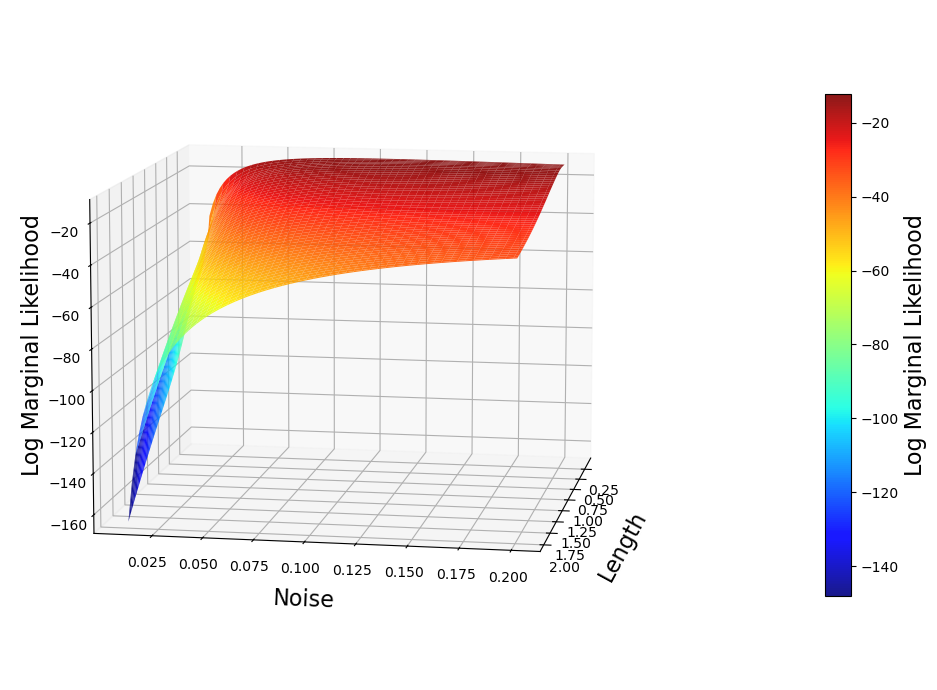

In [14]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot: X=Lengthscale, Y=Noise, Z=Log Marginal Likelihood
surf = ax.plot_surface(L, N, LML, cmap='jet', edgecolor='none', alpha=0.9)

# Axis labels
ax.set_xlabel('Length', fontsize=16, labelpad=12)
ax.set_ylabel('Noise', fontsize=16, labelpad=12)
#ax.set_zlabel('Log Marginal Likelihood', fontsize=12, labelpad=12)
fig.text(0.035, 0.5, 'Log Marginal Likelihood', va='center', rotation='vertical', fontsize=16)

# Color bar
cbar = plt.colorbar(surf, pad=0.15, shrink=0.75)
cbar.set_label('Log Marginal Likelihood', fontsize=16)

# Title
#plt.title(f'GP Log Marginal Likelihood (Variance fixed at {fixed_variance})', fontsize=14)

# View angle
ax.view_init(elev=10, azim=10)  # Adjust angles as desired


plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\lengthvsnoise.png",dpi=300, bbox_inches='tight')
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from tqdm import tqdm

# --- Setup --- #
boundsl = ((1e-4, 10))
varbounds = (1e-20, 10)
noiselvlbounds = (1e-20, 10)

# --- Define ranges for all three hyperparameters --- #
lengths = np.linspace(0.075,.125, 25)      # Lengthscale range
variances = np.linspace(0.85,1.25, 25)      # Signal variance range
noises = np.linspace(.075,.125, 25)      # Noise level range

# --- Build a 3D grid for the three parameters --- #
L, V, N = np.meshgrid(lengths, variances, noises, indexing='ij')
LML = np.zeros_like(L)

print("Evaluating Log Marginal Likelihood over the 3D grid...")
# Triple loop over the grid indices
for i in tqdm(range(L.shape[0]), desc="Loop over Lengthscale"):
    for j in range(L.shape[1]):
        for k in range(L.shape[2]):
            kernel = (C(constant_value=V[i, j, k], constant_value_bounds=varbounds) *
                      RBF(length_scale=L[i, j, k], length_scale_bounds=boundsl) +
                      WhiteKernel(noise_level=N[i, j, k], noise_level_bounds=noiselvlbounds))
            
            gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None)
            gpr.fit(xtrain, ytrain)  # xtrain and ytrain must be defined in your workspace
            LML[i, j, k] = gpr.log_marginal_likelihood()

# Flatten the arrays for scatter plotting
lengths_flat = L.flatten()
variances_flat = V.flatten()
noises_flat = N.flatten()
LML_flat = LML.flatten()


Evaluating Log Marginal Likelihood over the 3D grid...


Loop over Lengthscale: 100%|██████████| 25/25 [00:20<00:00,  1.22it/s]


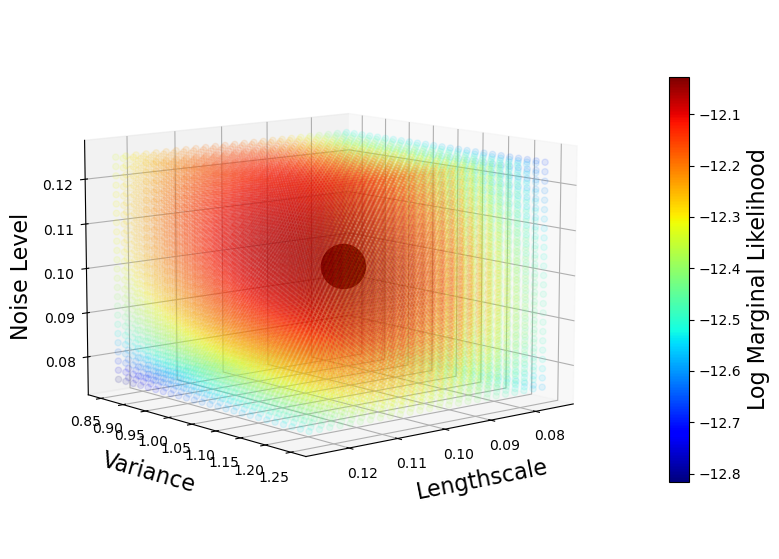

In [16]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(lengths_flat, variances_flat, noises_flat, 
                c=LML_flat, cmap='jet', marker='o', alpha=0.1)
ax.set_xlabel('Lengthscale', fontsize=16, labelpad=10)
ax.set_ylabel('Variance', fontsize=16, labelpad=10)
# Remove the default z-axis label
ax.set_zlabel('', fontsize=16, labelpad=20)

ax.view_init(elev=10, azim=50)

# Plot the peak point with a filled marker, disabling depth shading:
ax.scatter(lpeak, varpeak, noisepeak, marker='o', s=1000, 
           color='black', depthshade=False)

norm = plt.Normalize(vmin=LML_flat.min(), vmax=LML_flat.max())
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, pad=0.1, shrink=0.75)
cbar.set_label('Log Marginal Likelihood', fontsize=16)

# Instead of the default z-label, add a fixed label to the figure
fig.text(0.125, 0.5, 'Noise Level', va='center', rotation='vertical', fontsize=16)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\LogLike3params",dpi=300, bbox_inches='tight')

plt.show()


### Kernel Hyper-parameters

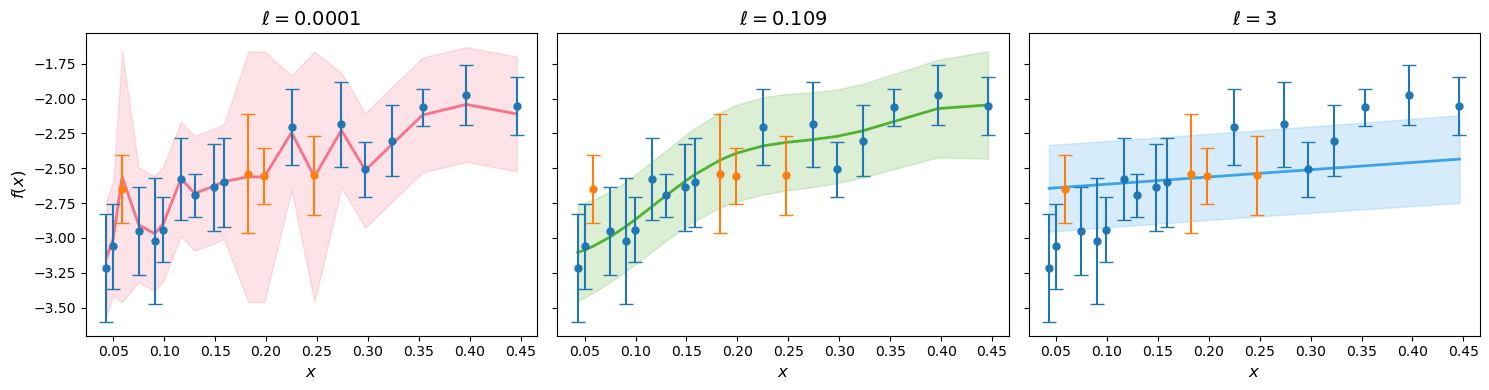

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
ls = np.array([0.0001, 0.109, 3])
titles = [r"$\ell = 0.0001$", r"$\ell = 0.109$", r"$\ell = 3$"]
colors = sns.color_palette("husl", len(ls))
var = 1.2
noise = 0.15

for idx, l in enumerate(ls):
    kernel = C(var) * RBF(length_scale=l) + WhiteKernel(noise)
    gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None, random_state=42)
    gpr.fit(xtrain.reshape(-1, 1), ytrain)
    y_pred, sigma = gpr.predict(x.reshape(-1, 1), return_std=True)

    axs[idx].plot(x, y_pred, color=colors[idx], linewidth=2, label="GP Mean")
    axs[idx].fill_between(x, y_pred - 2*sigma, y_pred + 2*sigma, color=colors[idx], alpha=0.2)
    axs[idx].errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,markersize=5, label='Training Data')
    axs[idx].errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,markersize=5, label='Test Data')

    axs[idx].set_title(titles[idx], fontsize=14, weight="bold")
    axs[idx].set_xlabel(r"$x$", fontsize=12)
    axs[idx].tick_params(axis='both', labelsize=10)
    axs[idx].grid(False)

axs[0].set_ylabel(r"$f(x)$", fontsize=12)
#axs[0].legend(fontsize=10, frameon=False, loc="upper right")
plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\RBFlengthparam",dpi=300, bbox_inches='tight')
plt.show()


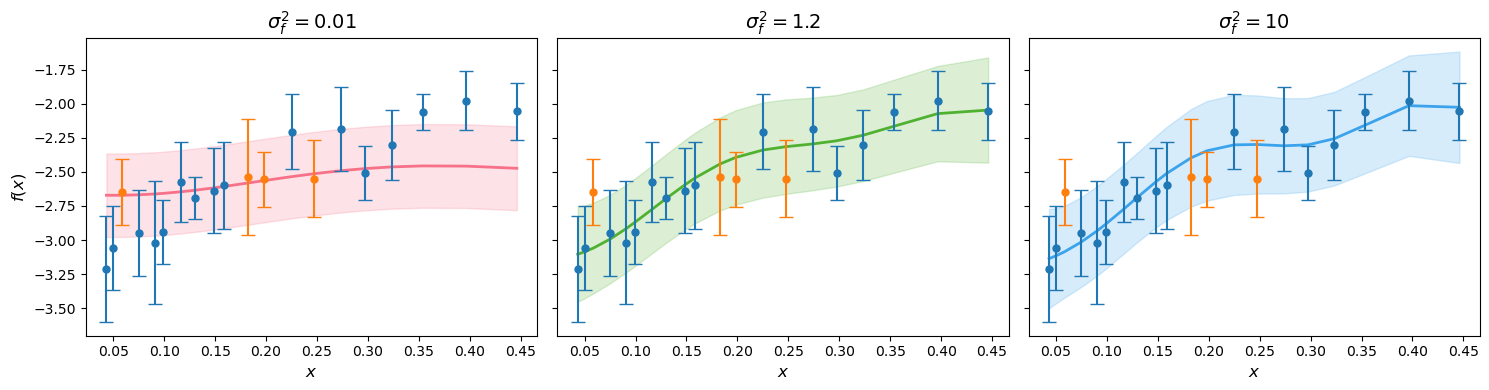

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
vars = np.array([0.01, 1.2, 10])
titles = [r"$\sigma_f^2 = 0.01$", r"$\sigma_f^2 = 1.2$", r"$\sigma_f^2 = 10$"]
colors = sns.color_palette("husl", len(ls))
l = 0.109
noise = 0.15

for idx, var in enumerate(vars):
    kernel = C(var) * RBF(length_scale=l) + WhiteKernel(noise)
    gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None, random_state=42)
    gpr.fit(xtrain.reshape(-1, 1), ytrain)
    y_pred, sigma = gpr.predict(x.reshape(-1, 1), return_std=True)

    axs[idx].plot(x, y_pred, color=colors[idx], linewidth=2, label="GP Mean")
    axs[idx].fill_between(x, y_pred - 2*sigma, y_pred + 2*sigma, color=colors[idx], alpha=0.2)
    axs[idx].errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,markersize=5, label='Training Data')
    axs[idx].errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,markersize=5, label='Test Data')

    axs[idx].set_title(titles[idx], fontsize=14, weight="bold")
    axs[idx].set_xlabel(r"$x$", fontsize=12)
    axs[idx].tick_params(axis='both', labelsize=10)
    axs[idx].grid(False)

axs[0].set_ylabel(r"$f(x)$", fontsize=12)
#axs[0].legend(fontsize=10, frameon=False, loc="upper right")
plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\RBFvarparam",dpi=300, bbox_inches='tight')
plt.show()

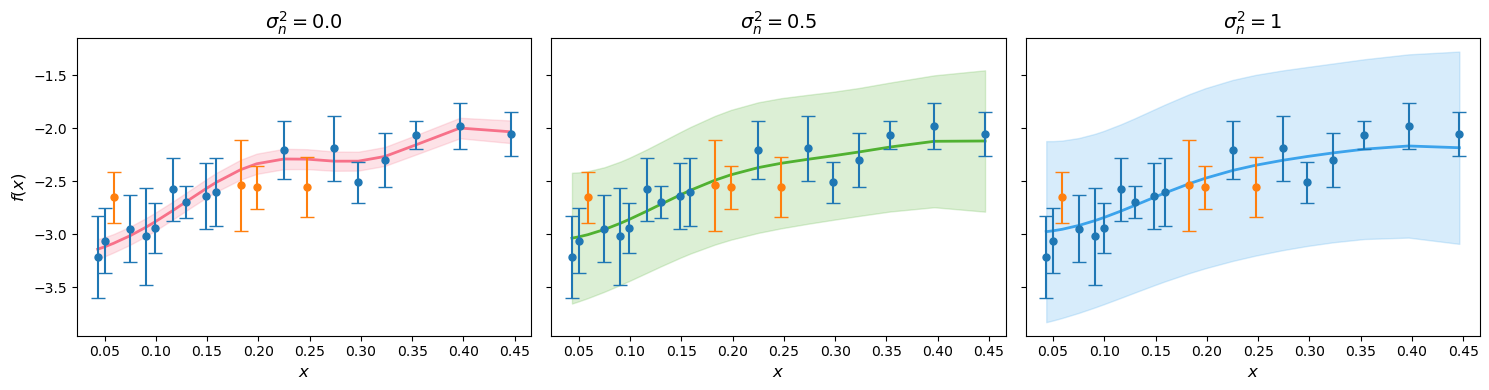

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
noises  = np.array([0.01, 0.5, 1])
titles = [r"$\sigma_n^2 = 0.0$", r"$\sigma_n^2 = 0.5$", r"$\sigma_n^2 = 1$"]
colors = sns.color_palette("husl", len(ls))
l = 0.109
var = 1.2

for idx, noise in enumerate(noises):
    kernel = C(var) * RBF(length_scale=l) + WhiteKernel(noise)
    gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer=None, random_state=42)
    gpr.fit(xtrain.reshape(-1, 1), ytrain)
    y_pred, sigma = gpr.predict(x.reshape(-1, 1), return_std=True)

    axs[idx].plot(x, y_pred, color=colors[idx], linewidth=2, label="GP Mean")
    axs[idx].fill_between(x, y_pred - 2*sigma, y_pred + 2*sigma, color=colors[idx], alpha=0.2)
    axs[idx].errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,markersize=5, label='Training Data')
    axs[idx].errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,markersize=5, label='Test Data')

    axs[idx].set_title(titles[idx], fontsize=14, weight="bold")
    axs[idx].set_xlabel(r"$x$", fontsize=12)
    axs[idx].tick_params(axis='both', labelsize=10)
    axs[idx].grid(False)

axs[0].set_ylabel(r"$f(x)$", fontsize=12)
#axs[0].legend(fontsize=10, frameon=False, loc="upper right")
plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\RBFnoiseparam",dpi=300, bbox_inches='tight')
plt.show()

### White Kernel. Guess init noise

1.08**2 * RBF(length_scale=0.109) + WhiteKernel(noise_level=0.105)


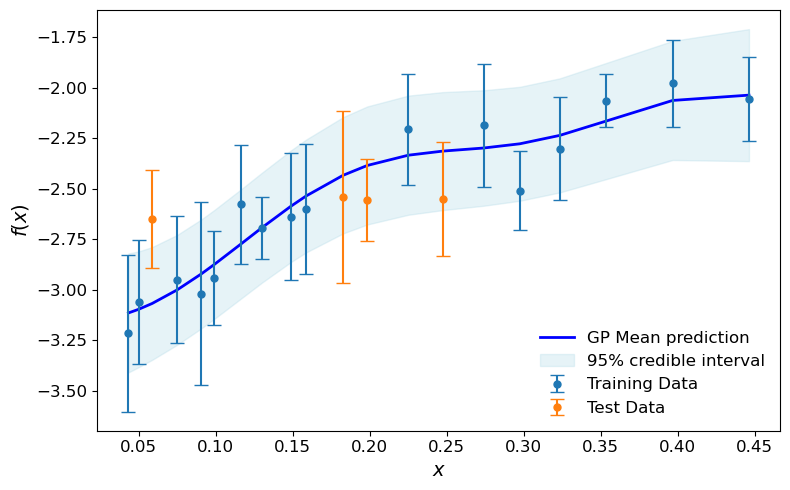

In [8]:
boundsl = ((1e-4, 10))  
initl = 1
initvar = 1.0
varbounds = (1e-20, 10)
noiselvl = 1
noiselvlbounds = (1e-20, 10)

kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
         RBF(length_scale=initl, length_scale_bounds=boundsl) + \
         WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)

gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10, random_state=42)
gpr1.fit(xtrain, ytrain)
y_pred, sigma = gpr1.predict(x.reshape(-1, 1), return_std=True)

# Plotting GPR result
plt.figure(figsize=(8, 5))  # Same size
print(gpr1.kernel_)
# GP mean prediction
plt.plot(x, y_pred, 'b-', linewidth=2, label="GP Mean prediction")

# Error bars for training and test data
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,
             markersize=5, label='Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,
             markersize=5, label='Test Data')

# Credible interval
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3, label="95% credible interval")

# Axis labels and ticks
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, layout
plt.grid(False)
plt.legend(fontsize=12, frameon=False)
plt.tight_layout()

# Save figure
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRwhitekernel.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
xtrain, xtest, ytrain, ytest,etrain,etest = train_test_split(x, y,errory, test_size=0.2,shuffle = True,random_state = 25,)
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

In [10]:
K_train = gpr1.kernel_(xtrain)
#print("Training Covariance Matrix (K(X, X)):\n", K_train)
#print(K_train)
#K_test_train = gpr1.kernel_(xtest, xtrain)
#print("Covariance Matrix (K(X*, X)):\n", K_test_train)
#print(K_test_train)


## White Kernel with initial white noise and bounds set by error bars

c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.17623528547002035. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


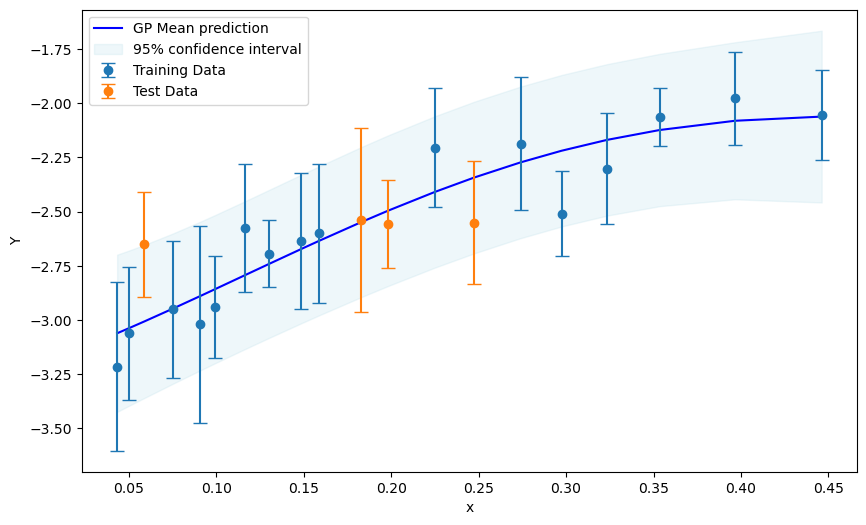

[1.15964137 0.10852376 0.10499622]


In [11]:
boundsl = ((1e-4, 10))  
initl = 1
initvar = 1.0
varbounds = (1e-20, 1e20)
noiselvl = errory.mean()
noiselvlbounds = (errory.mean()-1e-1,errory.mean()+1e-1)

kernel = C(constant_value = initvar,constant_value_bounds = varbounds)* RBF(length_scale= initl, length_scale_bounds= boundsl)+WhiteKernel(noiselvl,noise_level_bounds=noiselvlbounds)
gpr2 = GaussianProcessRegressor(kernel=kernel,normalize_y=True, n_restarts_optimizer=10)
gpr2.fit(xtrain, ytrain)
y_pred, sigma = gpr2.predict(x.reshape(-1,1), return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
#plt.scatter(xtrain, ytrain, c='r', label="Training points")
#plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(x, y_pred, 'b-', label="GP Mean prediction")
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(),fmt='o', capsize=5,label = 'Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(),fmt='o', capsize=5,label = 'Test Data')
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("x")
plt.ylabel("Y")
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRwhitekernel.png", dpi=300, bbox_inches='tight')
plt.legend()
plt.show()
print(np.exp(gpr1.kernel_.theta))

## Using alpha = Err^2, pointwise known noise

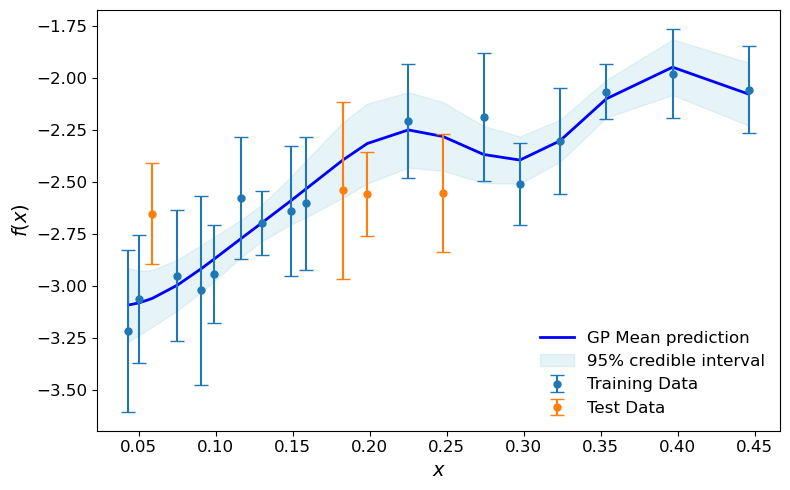

In [13]:
boundsl = ((0.0001, 10))  
initl = 1
initvar = 1.0
varbounds = (0.0001, 1e20)

# Kernel without WhiteKernel but with error handled via alpha
kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
         RBF(length_scale=initl, length_scale_bounds=boundsl)

# ----------- Fit GPR -----------
gpr3 = GaussianProcessRegressor(kernel=kernel, alpha=etrain**2, normalize_y=True, 
                                n_restarts_optimizer=10, random_state=42)
gpr3.fit(xtrain, ytrain)
y_pred, sigma = gpr3.predict(x.reshape(-1, 1), return_std=True)

# ----------- Plotting -----------
plt.figure(figsize=(8, 5))  # Match figure size to first plot

# GP mean prediction
plt.plot(x, y_pred, 'b-', linewidth=2, label="GP Mean prediction")

# Error bars for training and test data
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,
             markersize=5, label='Training Data')  # Same style as first plot
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,
             markersize=5, label='Test Data')

# Credible interval
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3, label="95% credible interval")  # Match alpha and color

# Axis labels and ticks
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, layout
plt.grid(False)
plt.legend(fontsize=12, frameon=False)
plt.tight_layout()

# Save figure
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRerror2.png", dpi=300, bbox_inches='tight')
plt.show()
#### New value min(l/etrain) , I have found this to help me not overfight or underfit if I keep it in regions of 0.1 to 0.5. How could I add this to my model above???

In [15]:
K_train = gpr3.kernel_(xtrain)
#print("Training Covariance Matrix (K(X, X)):\n", K_train)
print(np.diag(K_train))
#K_test_train = gpr1.kernel_(xtest, xtrain)
#print("Covariance Matrix (K(X*, X)):\n", K_test_train)
#print(K_test_train)

[0.90612082 0.90612082 0.90612082 0.90612082 0.90612082 0.90612082
 0.90612082 0.90612082 0.90612082 0.90612082 0.90612082 0.90612082
 0.90612082 0.90612082 0.90612082 0.90612082]


## Monte Carlo sampling with error distributed N(0,err^2)

In [16]:
plt.figure()
n_samples = 2000  # Number of Monte Carlo samples
n_gp_samples = 50  # Number of function samples per GP

#C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
kernel = RBF(length_scale=1)
posterior_history = []  
for sample in tqdm(range(n_samples), desc="Monte Carlo Sampling Progress"):

    ####  This follows the logic since we are saying the error is normally distributed with error 0 and std E_train. There for the error bars which represent 1 standard deviation 
    ###### had this as np.random.normal(0, E_train) for ages should be E_train**2 I think
    #### random normal wants std not variance
    sampled = ytrain + np.random.normal(0, etrain.reshape(-1,1))

    gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer = 15)
    gpr.fit(xtrain, sampled)

    posterior_sample = gpr.sample_y(x.reshape(-1,1), n_gp_samples)
    #print(posterior_sample.shape)
    #print(posterior_sample)
    #print(posterior_sample.shape)# Expected shape: (250, 10)
    posterior_history.append(posterior_sample)  # Append directly

# Convert to NumPy array for final processing
posterior_history = np.array(posterior_history)

Monte Carlo Sampling Progress:   0%|          | 1/2000 [00:00<05:27,  6.11it/s]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
Monte Carlo Sampling Progress:   0%|          | 6/2000 [00:00<01:22, 24.31it/s]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and ca

<Figure size 640x480 with 0 Axes>

In [17]:
print(posterior_history.shape)

(2000, 20, 50)


(20,)


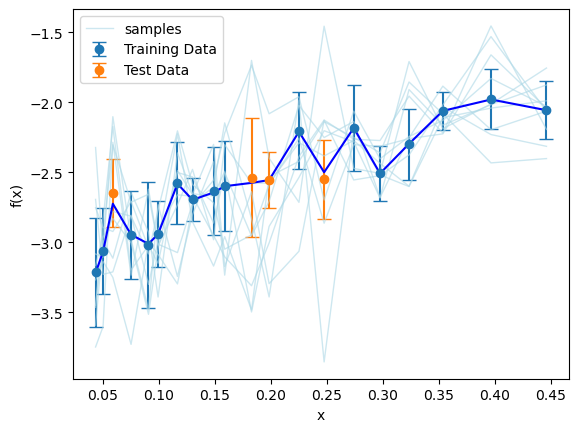

In [ ]:
posterior_history = np.array(posterior_history)
mean_posterior = np.mean(posterior_history, axis=(0,2))
std_posterior = np.std(posterior_history, axis=(0,2))
print(mean_posterior.shape)


plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5, label='Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5, label='Test Data')

# Plot sample functions. Only label the first one.
for i in range(10):
    if i == 0:
        lab = 'samples'
    else:
        lab = None
    plt.plot(x.ravel(), posterior_history[np.random.randint(0, n_samples), :, np.random.randint(0, n_gp_samples)],
             color='lightblue', alpha=0.6, linewidth=1, label=lab)

plt.plot(x, mean_posterior, 'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Montecarlosampling.png", dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

(20,)


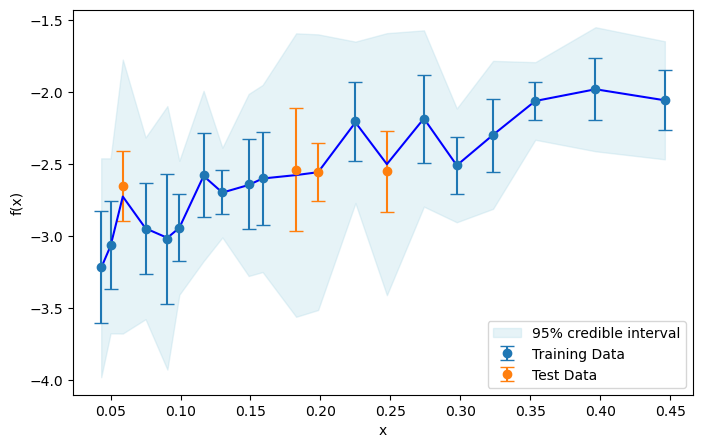

In [23]:
posterior_history = np.array(posterior_history)
mean_posterior = np.mean(posterior_history,axis=(0,2))
std_posterior = np.std(posterior_history,axis=(0,2))
print(mean_posterior.shape)

plt.figure(figsize=(8, 5))
plt.plot(x.ravel(), mean_posterior, c='w')
plt.fill_between(x.ravel(), mean_posterior - 2 * std_posterior, mean_posterior + 2 * std_posterior,
                 color="lightblue", alpha=0.3, label="95% credible interval")
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(),fmt='o', capsize=5,label = 'Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(),fmt='o', capsize=5,label = 'Test Data')
plt.plot(x, mean_posterior,'b-')
#plt.scatter(x, y, zorder=6, s=30)
#plt.errorbar(x, y, yerr=errory, ls='none', zorder=6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='lower right')
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRMonteCarlo.png", dpi=300, bbox_inches='tight')
#plt.title('Monte Carlo + RBF Gaussian Process. Accurate but expensive.')
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\averagemontecarlosample", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

### MCMC. Building a distribution over parameters and being able to see regions where l and sigma are good

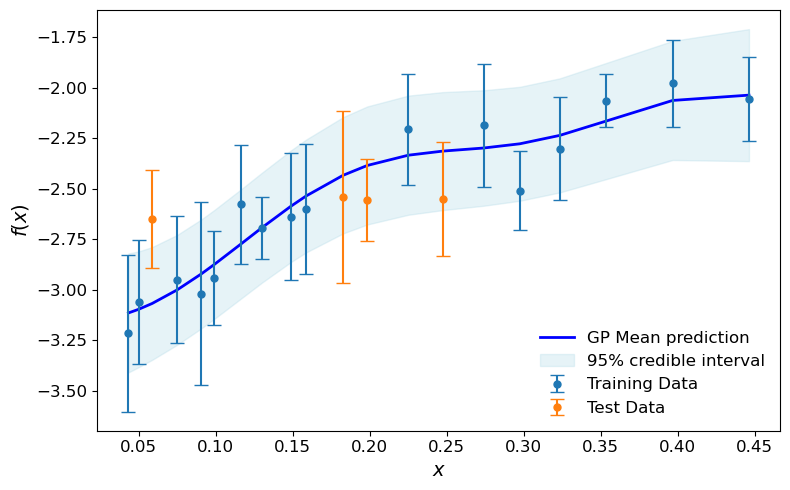

In [72]:
boundsl = ((1e-4, 10))  
initl = 1
initvar = 1.0
varbounds = (1e-20, 10)
noiselvl = 1
noiselvlbounds = (1e-20, 10)

kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
         RBF(length_scale=initl, length_scale_bounds=boundsl) + \
         WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)

gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10, random_state=42)
gpr1.fit(xtrain, ytrain)
var, l, noise = np.exp(gpr1.kernel_.theta)
y_pred, sigma = gpr1.predict(x.reshape(-1, 1), return_std=True)

# Plotting GPR result
plt.figure(figsize=(8, 5))  # Same size

# GP mean prediction
plt.plot(x, y_pred, 'b-', linewidth=2, label="GP Mean prediction")

# Error bars for training and test data
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,
             markersize=5, label='Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,
             markersize=5, label='Test Data')

# Credible interval
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3, label="95% credible interval")

# Axis labels and ticks
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, layout
plt.grid(False)
plt.legend(fontsize=12, frameon=False)
plt.tight_layout()

# Save figure
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRwhitekernel.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
def log_prior(theta):
    var, l1,noise = theta
    logp_var = uniform(loc=0.01, scale=4.99).logpdf(var)  
    logp_l1 = uniform(loc=0.01, scale=4.99).logpdf(l1)
    logp_noise = uniform(loc=0.01,scale =4.99).logpdf(noise)
    return logp_var + logp_l1 +logp_noise

In [74]:
def log_posterior(theta):
    if np.any(theta <= 0): 
        return -np.inf

    theta = np.log(theta)  

    if not np.isfinite(theta).all():   
        return -np.inf
    
    real_theta = np.exp(theta)
    lp = log_prior(real_theta)  

    if not np.isfinite(lp):
        return -np.inf

    ll = gpr1.log_marginal_likelihood(theta)
    if not np.isfinite(ll):    
        return -np.inf

###### Here I set things to minus infinity this means that they will be rejected and so basically removes them

    return lp + ll

In [75]:
ndim = 3
nwalkers = 12

mean = np.array([var, l,noise])


cov_matrix = np.diag([ 3*var, 6* l,6*noise]) 


### Where we start sampling. I take the absolute value here because I want my parameters to be positive
initial_pos = np.abs(np.random.multivariate_normal(mean, cov_matrix, nwalkers))  

### Sampler
####move = DEMove(gamma=0.5)  this is an option to use moves = move to try and increase the acceptance fraction
### try different moves
cov = 0.3*np.diag([var, l, noise])
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,moves = GaussianMove(cov=cov))

nsteps = 1000
samples = sampler.run_mcmc(initial_pos, nsteps, progress = True)

acceptance_fraction = sampler.acceptance_fraction


burnin = 100 ## Remove 100 at start of every walker
thin = 15 ## take 1 of every 15 samples
print(acceptance_fraction.mean())

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\seanw\anaconda3\Lib\site-packages\emcee\moves\mh.py:58: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = new_log_probs - state.log_prob + factors
100%|██████████| 1000/1000 [00:31<00:00, 31.40it/s]

0.2841666666666667


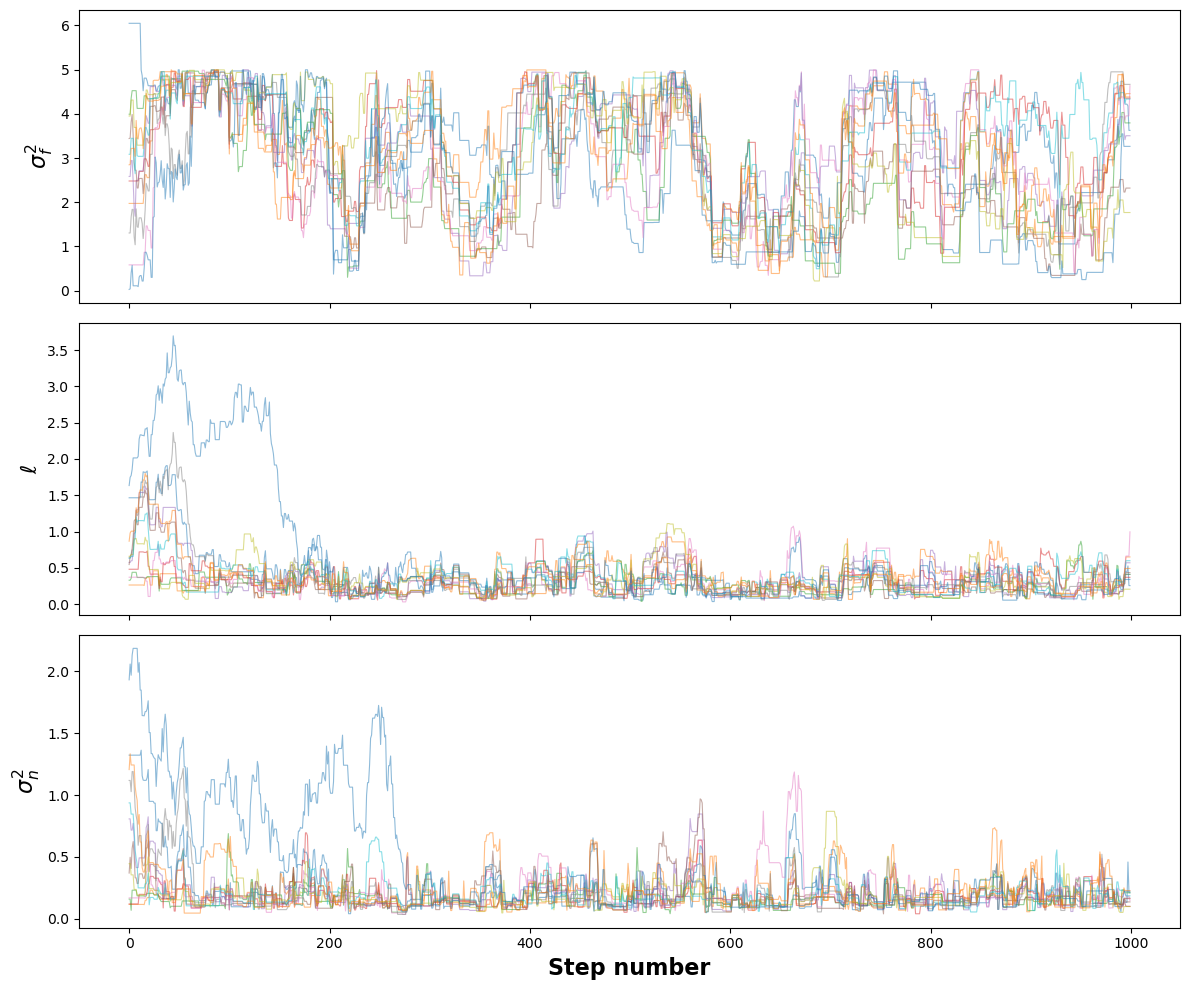

In [76]:
samples1 = sampler.get_chain()

parameter_labels = ["$\\sigma_f^2$", "$\\ell$","$\\sigma_n^2$"]
fig, axes = plt.subplots(ndim, 1, sharex=True, figsize=(12, 10))
for i in range(ndim):
    ax = axes[i]
    for walker in range(samples1.shape[1]):  
        ax.plot(samples1[:, walker, i], alpha=0.5, lw=0.8)
    ax.set_ylabel(parameter_labels[i],fontsize = 16,weight='bold')
    #ax.set_title(f"{parameter_labels[i]}",fontsize = 14)

axes[-1].set_xlabel("Step number",fontsize = 16,weight = 'bold')
plt.tight_layout()
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MCMCwalkers", dpi=300, bbox_inches='tight')
plt.show()

### Finding the kde densities manually so I can pull out the parameter peak values

In [78]:
from scipy.stats import gaussian_kde
peak_values = []
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
for i in range(ndim):
    samples_i = flat_samples[:, i]
    kde = gaussian_kde(samples_i)  

    x_range = np.linspace(np.min(samples_i), np.max(samples_i), 1000)
    density = kde(x_range)
    #plt.figure()
    #plt.plot(x_range, density, 
    #     color='gray', linewidth=2.5)
    peak = x_range[np.argmax(density)]
    peak_values.append(peak)
print("Peak values for each parameter:", peak_values)

Peak values for each parameter: [4.2178101929161285, 0.21284930433173804, 0.13667502661212225]


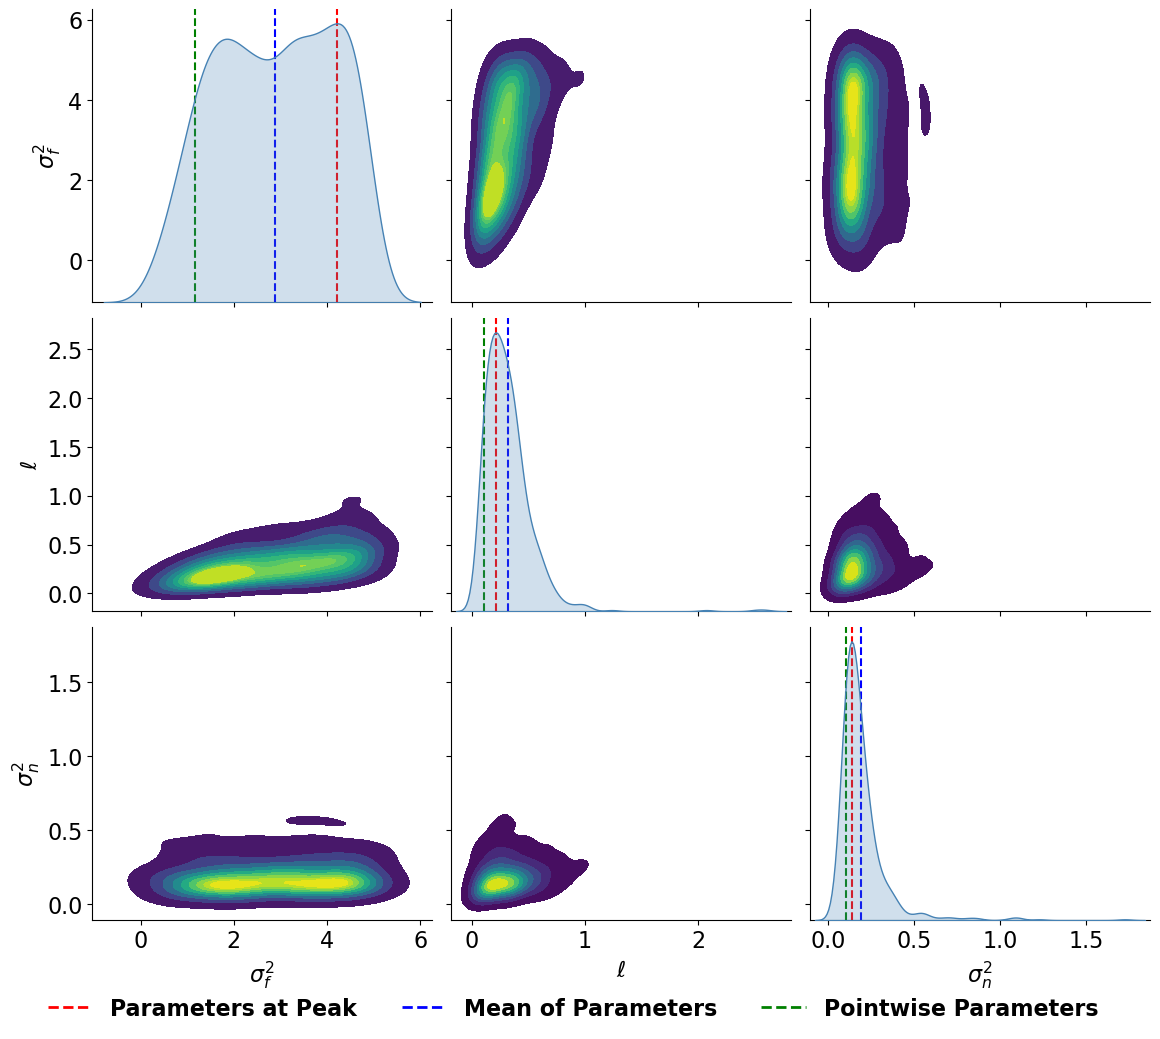

In [79]:
#### Flatten the samples so that I get an array with size (sample number, samples)
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
mean_values = np.mean(flat_samples, axis=0)    
df = pd.DataFrame(flat_samples, columns=["$\\sigma_f^2$", "$\\ell$","$\\sigma_n^2$"])
g = sns.pairplot(
    df,
    kind="kde",
    diag_kind="kde",
    plot_kws={'fill': True, 'cmap': 'viridis'},
    diag_kws={'fill': True, 'color': 'steelblue'},
)
g.fig.set_size_inches(12, 10) 

for ax in g.axes.flatten():
    ax.tick_params(labelsize=16)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_weight('bold')
    ax.yaxis.label.set_weight('bold')

g.axes[0, 0].axvline(peak_values[0], color="red", linestyle="--")   
g.axes[1, 1].axvline(peak_values[1], color="red", linestyle="--")
g.axes[2,2].axvline(peak_values[2],color='red',linestyle ="--")
g.axes[0, 0].axvline(mean_values[0], color="blue", linestyle="--")   
g.axes[1, 1].axvline(mean_values[1], color="blue", linestyle="--")
g.axes[2,2].axvline(mean_values[2],color='blue',linestyle ="--")
g.axes[0, 0].axvline(var, color="green", linestyle="--")   
g.axes[1, 1].axvline(l, color="green", linestyle="--")
g.axes[2,2].axvline(noise,color='green',linestyle ="--")
legend_elements = [Line2D([0], [0], color='red', lw=2, linestyle='--', label='Parameters at Peak'),
Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Mean of Parameters'),
Line2D([0], [0], color='green', lw=2, linestyle='--', label='Pointwise Parameters')]
legend = g.fig.legend(
    handles=legend_elements,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    frameon=False,
    prop={'size': 16, 'weight': 'bold'}
)

# Adjust spacing
g.fig.subplots_adjust(bottom=0.07)

# Show plot
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MCMCdistribution", dpi=300, bbox_inches='tight')

In [89]:
mean_values = np.mean(flat_samples, axis=0)     
std_values  = np.std(flat_samples, axis=0)       
ci_bounds   = np.percentile(flat_samples, [2.5, 97.5], axis=0)  

labels = ["sigma", "l1","noise"]
for i, label in enumerate(labels):
    # Option 1: Use .item() to extract the scalar
    mean_i = mean_values[i].item()
    std_i  = std_values[i].item()
    lower_ci = ci_bounds[0, i].item()
    upper_ci = ci_bounds[1, i].item()
    print(f"{label}: mean = {mean_i:.4f}, std = {std_i:.4f}, 95% CI = [{lower_ci:.4f}, {upper_ci:.4f}]")

sigma: mean = 2.8814, std = 1.2564, 95% CI = [0.6717, 4.8881]
l1: mean = 0.3173, std = 0.2224, 95% CI = [0.0836, 0.7497]
noise: mean = 0.1933, std = 0.1461, 95% CI = [0.0700, 0.5611]


## Plotting the mean values found by MCMC

In [ ]:
sigma = mean_values[0]
l1 = mean_values[1]
noise = mean_values[2]
print(l1)
print(sigma)

0.3173391062887264
2.8814407416631544


0.3173391062887264


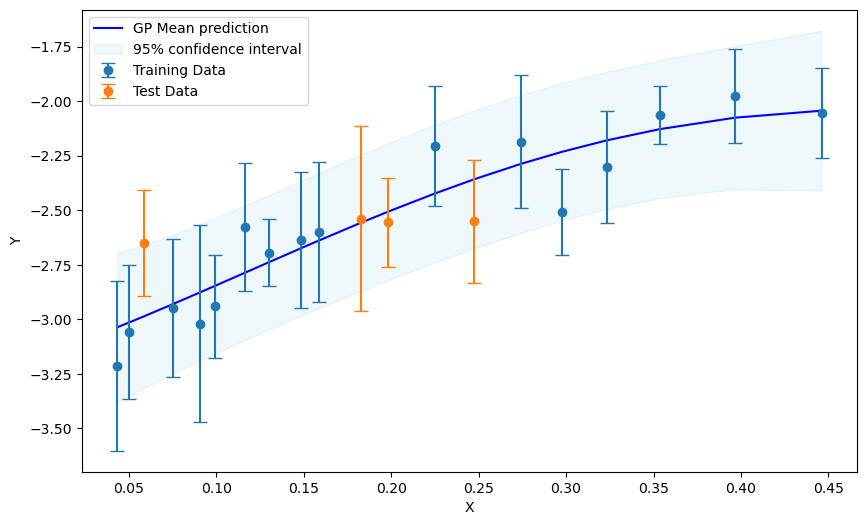

In [96]:
boundsl = ((1e-1, 10))  
initl = l1
initvar = sigma
varbounds = (1e-20, 1e20)
noiselvl = errory.mean()


kernel = C(constant_value = initvar,constant_value_bounds = varbounds)* RBF(length_scale= initl, length_scale_bounds= boundsl)+WhiteKernel(noise)
gpr3 = GaussianProcessRegressor(kernel=kernel,alpha = etrain**2,normalize_y=True, optimizer=None)
gpr3.fit(xtrain, ytrain)
y_pred, sigma = gpr3.predict(x.reshape(-1,1), return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
#plt.scatter(xtrain, ytrain, c='r', label="Training points")
#plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(x, y_pred, 'b-', label="GP Mean prediction")
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(),fmt='o', capsize=5,label = 'Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(),fmt='o', capsize=5,label = 'Test Data')
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MCMCmeangpr", dpi=300, bbox_inches='tight')
sigma = np.exp(gpr3.kernel_.theta)[0]
l = np.exp(gpr3.kernel_.theta)[1]
print(l)

## Plotting the Peaked values

0.21284930433173804 4.2178101929161285
0.21284930433173804


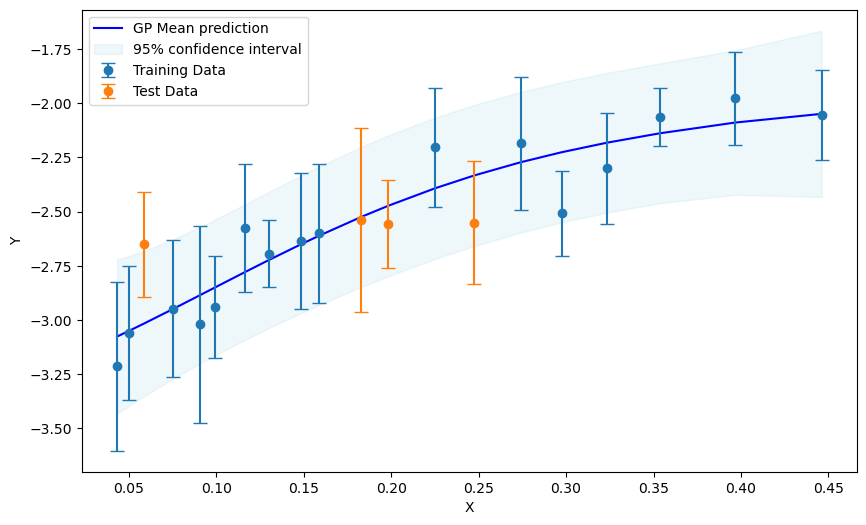

In [97]:
boundsl = ((1e-1, 10))  
initvar = peak_values[0]
initl = peak_values[1]
noise = peak_values[2]
varbounds = (1e-20, 1e20)
noiselvl = errory.mean()
print(initl,initvar)


kernel = C(constant_value = initvar)* RBF(length_scale= initl)+WhiteKernel(noise)
gpr3 = GaussianProcessRegressor(kernel=kernel,alpha = etrain**2,normalize_y=True, optimizer=None)
gpr3.fit(xtrain, ytrain)
y_pred, sigma = gpr3.predict(x.reshape(-1,1), return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
#plt.scatter(xtrain, ytrain, c='r', label="Training points")
#plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(x, y_pred, 'b-', label="GP Mean prediction")
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(),fmt='o', capsize=5,label = 'Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(),fmt='o', capsize=5,label = 'Test Data')
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MCMCpeakgpr", dpi=300, bbox_inches='tight')
sigma = np.exp(gpr3.kernel_.theta)[0]
l = np.exp(gpr3.kernel_.theta)[1]
print(l)

## Marginalising over Both distributions to find predictive distribution. Sort of cancels out the noise

In [98]:
# Storage for predictions
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print(flat_samples)
S = len(flat_samples)
pred_means = np.zeros((S, len(x)))
pred_vars = np.zeros((S, len(x)))

for s in tqdm(range(S), desc="Running GP Predictions", unit="sample"):
    theta_s = flat_samples[s] 
    kernel = gpr3.kernel_.clone_with_theta(np.log(theta_s)) 
    gp = GaussianProcessRegressor(kernel=kernel,alpha = etrain**2,normalize_y=True, optimizer = None)  
    gp.fit(xtrain, ytrain) 
    pred_means[s, :], pred_stds = gp.predict(x.reshape(-1,1), return_std=True)
    pred_vars[s, :] = pred_stds**2  

[[4.97067811 0.44677322 0.09722808]
 [3.89850356 0.3902593  0.16989321]
 [3.17178968 0.29626086 0.15491128]
 ...
 [4.33483037 0.59895309 0.18554941]
 [3.26454178 0.34037864 0.2226679 ]
 [4.3829158  0.49222398 0.22718577]]


Running GP Predictions: 100%|██████████| 720/720 [00:02<00:00, 250.32sample/s]


In [99]:
final_mean = np.mean(pred_means, axis=0)
final_variance = np.mean(pred_vars + pred_means**2, axis=0) - final_mean**2
final_std = np.sqrt(final_variance)

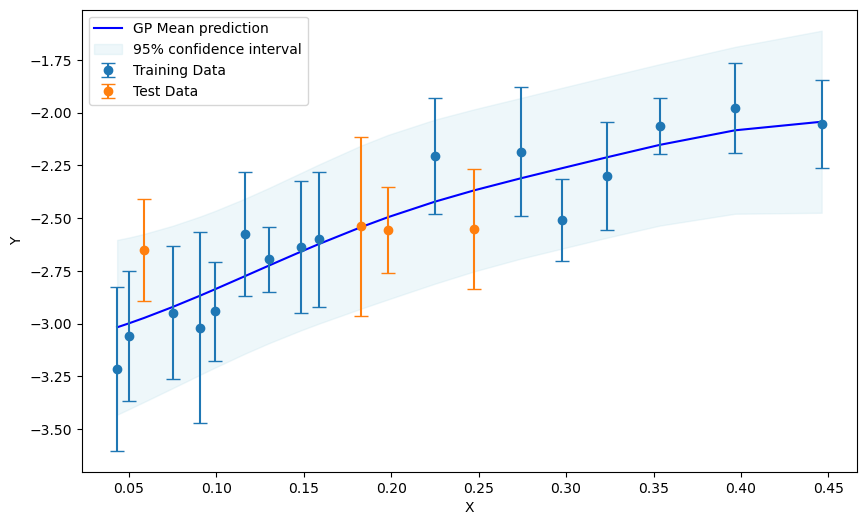

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(x, final_mean, 'b-', label="GP Mean prediction")
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(),fmt='o', capsize=5,label = 'Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(),fmt='o', capsize=5,label = 'Test Data')
plt.fill_between(x.ravel(), final_mean - 2 * final_std, final_mean + 2 * final_std, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MCMCaveragegpr", dpi=300, bbox_inches='tight')
plt.show()